In [1]:
#importing Python libraries
from datascience import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

sns.set_style('white')

In [2]:
#creating the data table
#link to the original dataset here: https://www.kaggle.com/gregorut/videogamesales

vg = Table.read_table('video_games.csv')
vg

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,nan,nan,nan,nan,nan,nan
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,nan,nan,nan,nan,nan,nan
Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,nan,nan,nan,nan,nan,nan
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.5,2.88,29.8,89,65,8.5,431,Nintendo,E
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.7,2.24,28.32,87,80,8.4,594,Nintendo,E
Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,nan,nan,nan,nan,nan,nan


In [3]:
#filtering out all irrelevant columns

vg_filtered = vg.drop('Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer')
vg_filtered

Name,Platform,Year_of_Release,Genre,Global_Sales,Rating
Wii Sports,Wii,2006,Sports,82.53,E
Super Mario Bros.,NES,1985,Platform,40.24,nan
Mario Kart Wii,Wii,2008,Racing,35.52,E
Wii Sports Resort,Wii,2009,Sports,32.77,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37,nan
Tetris,GB,1989,Puzzle,30.26,nan
New Super Mario Bros.,DS,2006,Platform,29.8,E
Wii Play,Wii,2006,Misc,28.92,E
New Super Mario Bros. Wii,Wii,2009,Platform,28.32,E
Duck Hunt,NES,1984,Shooter,28.31,nan


In [4]:
#sorting them in descending order of Global_Sales, just to be safe

vg_filtered.sort('Global_Sales')
vg_filtered.show(100)

Name,Platform,Year_of_Release,Genre,Global_Sales,Rating
Wii Sports,Wii,2006,Sports,82.53,E
Super Mario Bros.,NES,1985,Platform,40.24,nan
Mario Kart Wii,Wii,2008,Racing,35.52,E
Wii Sports Resort,Wii,2009,Sports,32.77,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37,nan
Tetris,GB,1989,Puzzle,30.26,nan
New Super Mario Bros.,DS,2006,Platform,29.8,E
Wii Play,Wii,2006,Misc,28.92,E
New Super Mario Bros. Wii,Wii,2009,Platform,28.32,E
Duck Hunt,NES,1984,Shooter,28.31,nan


In [5]:
#I chose to convert the data table into a Pandas DataFrame just because I found DataFrames to be easier to
    # work with and manipulate.
#This is also where I deleted every row past index 100, leaving just the 100 best-selling games.

vg_filtered100 = vg_filtered.to_df()
vg_filtered100.drop(vg_filtered100.index[100:], inplace=True)
vg_filtered100.set_index(['Name'])
vg_filtered100

,Name,Platform,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,nan
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,nan
5,Tetris,GB,1989.0,Puzzle,30.26,nan
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,E
7,Wii Play,Wii,2006.0,Misc,28.92,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.32,E
9,Duck Hunt,NES,1984.0,Shooter,28.31,nan


In [6]:
#I created these variables for convenience sake. They were useful when creating the visualizations.
#The variables count the number of occurrences of each value in their respective columns.
#I printed the rating_count variable as an example

rating_count = vg_filtered100['Rating'].value_counts()
genre_count = vg_filtered100['Genre'].value_counts()
platform_count = vg_filtered100['Platform'].value_counts()
rating_count

nan     36
E       30
M       26
T        6
E10+     2
Name: Rating, dtype: int64

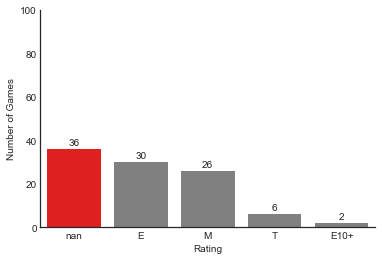

In [7]:
#This is where I began to make the visualizations. This one is for the frequency of each ESRB rating.

#I wanted to create a palette that differentiates the maximum value of occurrences, just to make the graph
    # easier to look at and interpret
colors = ['red' if (x == max(rating_count)) else 'gray' for x in rating_count]

#I used this specific ordering for the visualization because it was the easiest way to ensure that
    # the validation statement for the palette colors would remain consistent in terms of
    # which bar it would highlight
ax = sns.countplot(x="Rating", data=vg_filtered100, order=rating_count.index, palette=colors)

#I set the limit of the y-axis to the size of the dataset, for the top 100 games
ax.set_ylim(0, 100)
ax.set_ylabel('Number of Games')

#This was just to make the graph look nicer
sns.despine()

#I wanted to include the actual values of each bar in the graph itself to make the data easier to interpret.
    #This was the easiest way I could find that accomplishes this.
    #This places the value of each bar slightly above their respective bar.
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+3), ha='center', va='center')

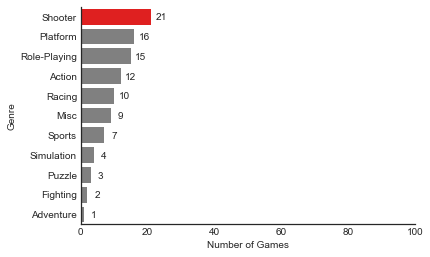

In [8]:
#The following visualizations are very similar to the first one in both looks and composition.
    #The only difference is that I chose to make them horizontal bar graphs, since the labels for
        # each of the genres and platforms made the x-axis look extremely crowded. It looks
        # slightly better this way than it does as a vertical bar graph.
#The only real difference in terms of coding these graphs was some swapping of x- and y-values.

colors = ['red' if (x == max(genre_count)) else 'gray' for x in genre_count]
ax = sns.countplot(y="Genre", data=vg_filtered100, order=genre_count.index, palette=colors)
ax.set_xlim(0, 100)
ax.set_xlabel('Number of Games')
sns.despine()

#This for loop is slightly different, as I needed to get the values for the width of each bar rather than the
    # height, and I needed to print the values of each bar to the bars' right rather than above them.
for p in ax.patches:
    ax.text(3+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.0f}'.format(p.get_width()), ha='center', va='center')

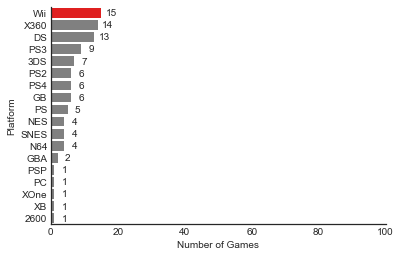

In [9]:
#Same creation premise as the genre graph, just with the platform data instead.

colors = ['red' if (x == max(platform_count)) else 'gray' for x in platform_count]
ax = sns.countplot(y="Platform", data=vg_filtered100, order=platform_count.index, palette=colors)
ax.set_xlim(0, 100)
ax.set_xlabel('Number of Games')
sns.despine()
for p in ax.patches:
    ax.text(3+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.0f}'.format(p.get_width()), ha='center', va='center')